## Part 1: Extracting Correlation Coefficients

Here, we look at the data containing log returns for the S&P 500 companies.

In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import re

Data is located at: `/data/2_Stock_Prices.csv`

In [53]:
# Load the data
df_all = pd.read_csv('./data/2_Stock_Prices.csv', index_col=0)

# Pick 2015 data
df = df_all.loc["2015-01-02":"2016-01-02"]
df.head()

,AAPL,MSFT,AMZN,BRK-B,FB,JPM,JNJ,GOOG,XOM,BAC,...,APH,YUM,ORLY,GIS,DG,GLW,ADM,PPG,PXD,DFS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-02,102.3183,42.7921,308.52,149.17,78.450,57.2584,94.2874,524.81,80.9533,16.9308,...,51.9209,47.9199,192.11,46.8581,67.7405,21.0478,46.6881,108.3730,149.5115,60.6054
2015-01-05,99.4358,42.3940,302.19,147.00,77.190,55.4808,93.6289,513.87,78.7383,16.4389,...,50.9724,46.9463,188.72,46.0111,67.3003,20.7551,45.0726,105.5763,139.4769,59.2516
2015-01-06,99.4452,41.7763,295.29,146.84,76.150,54.0423,93.1688,501.96,78.3197,15.9471,...,50.3238,46.3701,188.08,45.8964,66.4485,20.3984,44.1841,105.3164,139.1079,57.8607
2015-01-07,100.8396,42.3071,298.42,148.88,76.150,54.1247,95.2256,501.10,79.1133,16.0228,...,51.1853,47.9067,189.79,46.8669,67.2524,20.6911,44.8482,105.7841,137.5817,58.7230
2015-01-08,104.7141,43.5517,300.46,151.37,78.175,55.3342,95.9743,502.68,80.4301,16.3538,...,52.1823,48.7412,193.24,47.6256,66.5250,21.3588,44.1930,108.5998,141.0529,59.6688


In [54]:
# Clean the data: Remove NaN values, get log returns
df = df.dropna(axis=1)
df = df.apply(np.log)
# Get daily log-returns
returns_df = df.diff().dropna(axis=0)
returns_df.head()

,AAPL,MSFT,AMZN,BRK-B,FB,JPM,JNJ,GOOG,XOM,BAC,...,APH,YUM,ORLY,GIS,DG,GLW,ADM,PPG,PXD,DFS
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-05,-0.028576,-0.009347,-0.020731,-0.014654,-0.016192,-0.031537,-0.007008,-0.021066,-0.027743,-0.029484,...,-0.018437,-0.020526,-0.017804,-0.018241,-0.006520,-0.014004,-0.035215,-0.026145,-0.069474,-0.022591
2015-01-06,0.000095,-0.014678,-0.023098,-0.001089,-0.013565,-0.026270,-0.004926,-0.023450,-0.005331,-0.030373,...,-0.012806,-0.012350,-0.003397,-0.002496,-0.012737,-0.017336,-0.019910,-0.002465,-0.002649,-0.023754
2015-01-07,0.013924,0.012626,0.010544,0.013797,0.000000,0.001524,0.021836,-0.001715,0.010082,0.004736,...,0.016974,0.032601,0.009051,0.020925,0.012025,0.014247,0.014918,0.004431,-0.011032,0.014793
2015-01-08,0.037703,0.028994,0.006813,0.016587,0.026245,0.022101,0.007832,0.003148,0.016507,0.020448,...,0.019291,0.017269,0.018015,0.016059,-0.010875,0.031760,-0.014717,0.026269,0.024917,0.015978
2015-01-09,0.001072,-0.008442,-0.011818,-0.012631,-0.005580,-0.017540,-0.013722,-0.013035,-0.001411,-0.018091,...,-0.005768,-0.001768,-0.028502,-0.010130,-0.020200,-0.001710,-0.008565,-0.012740,0.007819,-0.016134


### Plotting Median Correlation Coefficients

Here, we find the median correlation coefficient for each company for the year 2015, and plot the results as a histogram.

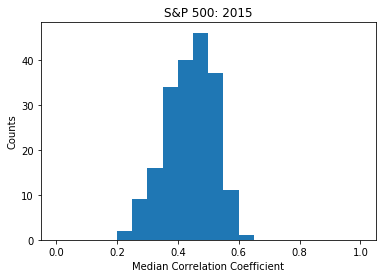

In [98]:
# Find the median correlation for each company for 2015 
median_corr_arr = np.zeros(len(returns_df.columns))
corr_matrix = returns_df.corr()
for idx, company in enumerate(returns_df.columns):
    # Don't take the 1.0 correlation with the company itself 
    mask = corr_matrix.index != company
    corr_list = corr_matrix[f'{company}'][mask]
    median_corr_arr[idx] = np.median(corr_list)

# Plot the results
fig, ax = plt.subplots(1,1)
bins = np.linspace(0,1,21)
ax.hist(median_corr_arr,bins=bins)
ax.set_xlabel('Median Correlation Coefficient')
ax.set_ylabel('Counts')
ax.set_title('S&P 500: 2015')
fig.savefig('./output/median_corr_coeff_dist.pdf')


### Identifying Companies with Min/Max Correlation Coeff.

Here, we identify the five companies with minimum and maximum correlation coefficients for 2015.

In [132]:
# Map the median correlation values with the companies
corr_map = {}
for idx, company in enumerate(corr_matrix.columns):
    corr_map[company] = median_corr_arr[idx]

# Sort the coefficients
sorted_corr_map = sorted(corr_map.items(), key=lambda item: item[1])

# Minimum & Maximum 5:
min5 = sorted_corr_map[:5]
max5 = sorted_corr_map[-5:]
max5.reverse()

# Print results
print('*'*40)
print('Top 5 Companies With Max Corr. Coef.:')
print('*'*40)
for comp, corr in max5:
    print(f'{comp}: {corr:.3f}')
print('*'*40)
print('Top 5 Companies With Min Corr. Coef.:')
print('*'*40)
for comp, corr in min5:
    print(f'{comp}: {corr:.3f}')


****************************************
Top 5 Companies With Max Corr. Coef.:
****************************************
BRK-B: 0.607
MMC: 0.599
FISV: 0.574
HON: 0.566
ITW: 0.563
****************************************
Top 5 Companies With Min Corr. Coef.:
****************************************
HUM: 0.203
KMI: 0.235
CI: 0.268
ILMN: 0.276
NFLX: 0.278


In [156]:
# Track low correlation 
def low_corr(corr_matrix,company,threshold=0.2):
    corr = corr_matrix[company]
    low_corr = corr[corr<threshold]
    num_low_corr = low_corr.size
    comp_low_corr = low_corr.index
    return comp_low_corr, num_low_corr
    
for comp in corr_matrix.columns:
    comp_low_corr, num_low_corr = low_corr(corr_matrix, company)
    if num_low_corr != 0:
        print(comp)
        print(f'{comp_low_corr}')

AAPL
Index(['HUM', 'CI'], dtype='object')
MSFT
Index(['HUM', 'CI'], dtype='object')
AMZN
Index(['HUM', 'CI'], dtype='object')
BRK-B
Index(['HUM', 'CI'], dtype='object')
FB
Index(['HUM', 'CI'], dtype='object')
JPM
Index(['HUM', 'CI'], dtype='object')
JNJ
Index(['HUM', 'CI'], dtype='object')
GOOG
Index(['HUM', 'CI'], dtype='object')
XOM
Index(['HUM', 'CI'], dtype='object')
BAC
Index(['HUM', 'CI'], dtype='object')
UNH
Index(['HUM', 'CI'], dtype='object')
V
Index(['HUM', 'CI'], dtype='object')
WFC
Index(['HUM', 'CI'], dtype='object')
PFE
Index(['HUM', 'CI'], dtype='object')
HD
Index(['HUM', 'CI'], dtype='object')
T
Index(['HUM', 'CI'], dtype='object')
VZ
Index(['HUM', 'CI'], dtype='object')
CSCO
Index(['HUM', 'CI'], dtype='object')
CVX
Index(['HUM', 'CI'], dtype='object')
INTC
Index(['HUM', 'CI'], dtype='object')
PG
Index(['HUM', 'CI'], dtype='object')
MA
Index(['HUM', 'CI'], dtype='object')
BA
Index(['HUM', 'CI'], dtype='object')
MRK
Index(['HUM', 'CI'], dtype='object')
C
Index(['HUM', 'C

## Part 2: Finding Eigenvalues of the Correlation Matrix

Here, we calculate the eigenvalue spectrum of the correlation matrix, looking at the whole S&P 500 data with all years included. 

In [159]:
# Take all data
df = df_all
# Clean the data: Remove NaN values, get log returns
df = df.dropna(axis=1)
df = df.apply(np.log)
# Get daily log-returns
returns_df = df.diff().dropna(axis=0)
corr_matrix = returns_df.corr()

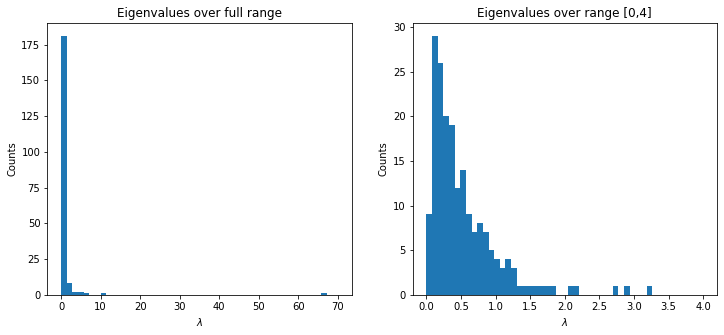

In [168]:
# Find the eigenvalues of the correlation matrix
eigvals = np.linalg.eigvals(corr_matrix)
bins_full = np.linspace(0,70)
bins = np.linspace(0,4)

# Plot the eigenvalue spectrum
fig, ax = plt.subplots(1,2,figsize=(12,5))
ax[0].hist(eigvals, bins=bins_full) # Entire range
ax[0].set_xlabel(r'$\lambda$')
ax[0].set_ylabel('Counts')
ax[0].set_title('Eigenvalues over full range')

ax[1].hist(eigvals, bins=bins) # Within the range [0,4]
ax[1].set_xlabel(r'$\lambda$')
ax[1].set_ylabel('Counts')
ax[1].set_title('Eigenvalues over range [0,4]')
fig.savefig('./output/eigval_dist_corrmatrix.pdf')

In [171]:
# Biggest eigenvalue
print(f'Biggest eigenvalue of correlation matrix: {eigvals[0]:.2f}')

Biggest eigenvalue of correlation matrix: 66.72


### Unfolding

Here, we calculate the unfolded eigenvalues and plot the new eigenvalue spectrum. We normalize the eigenvalues as follows:

$\xi_n = \frac{\lambda_n}{D(\lambda_n)}$ where $\lambda_n$ is the $n^{th}$ eigenvalue, and $D(\lambda_n)$ is the mean eigenvalue spacing around energy level $n$. 

In [245]:
# Get the ordered eigenvalues
ordered_eigvals = np.linalg.eigh(corr_matrix)[0]
spacings = np.diff(ordered_eigvals)

# Calculate moving average
def moving_average(diff, n=4):
    ret = np.cumsum(diff)
    ret[n:] = ret[n:] - ret[:-n]
    return ret[n-1:] / n

# To be continued here...
moving_avg = moving_average(spacings)

ordered_eigvals

array([4.84112646e-02, 5.28134546e-02, 5.78713079e-02, 6.38909389e-02,
       6.65118881e-02, 7.04034580e-02, 7.15634202e-02, 7.66722848e-02,
       7.95451511e-02, 8.29029470e-02, 8.77118790e-02, 9.42494172e-02,
       9.58491415e-02, 9.88295349e-02, 1.00241074e-01, 1.05557835e-01,
       1.08221215e-01, 1.09100768e-01, 1.10972596e-01, 1.13064394e-01,
       1.18999645e-01, 1.21069162e-01, 1.22181290e-01, 1.24846985e-01,
       1.26557392e-01, 1.32370499e-01, 1.33740717e-01, 1.36846117e-01,
       1.41383358e-01, 1.43068417e-01, 1.43700564e-01, 1.48547937e-01,
       1.52009093e-01, 1.53692187e-01, 1.56615651e-01, 1.58204754e-01,
       1.61751571e-01, 1.62504166e-01, 1.66281535e-01, 1.69018084e-01,
       1.72416282e-01, 1.73415102e-01, 1.77666003e-01, 1.79236759e-01,
       1.82730133e-01, 1.84207072e-01, 1.88913562e-01, 1.93738370e-01,
       1.95392580e-01, 1.96271452e-01, 1.99932225e-01, 2.03709816e-01,
       2.03987938e-01, 2.07523110e-01, 2.10250099e-01, 2.14019416e-01,
      